# Analysis dataset 18

In [15]:
import glob
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

dataset = 18


# Version old models

In [16]:
# Get list of all CSV files in the folder
csv_files = glob.glob(f'../output/1way pt rv old models/DHRdiff_{dataset}_*/metrics_*.csv')

# Read each CSV file into a DataFrame and store in a list
df_5models = pd.read_csv(csv_files[0], header=0, index_col=0)

# Display the combined DataFrame
df_5models.head()

,mse_before,mse12,tre_before,tre12,mse12_image_before,mse12_image,ssim12_image_before,ssim12_image,num_points,votes
index,,,,,,,,,,
0,590.99133,25.786713,32.300415,5.887544,0.076292,0.095992,0.317088,0.342642,12.0,"[0, 0, 3, 3, 3, 0, 6, 6, 6, 6, 6, 0, 6, 6, 6, ..."
1,702.97820,162.002940,36.293774,15.705562,0.140819,0.080546,0.443707,0.491619,6.0,"[0, 6, 6, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2]"
2,2938.06400,209.436860,76.484300,17.623781,0.086547,0.103533,0.310896,0.215036,11.0,"[5, 5, 5, 5, 5, 6, 6, 6, 3, 3, 3, 3, 3, 3, 3, ..."
3,1187.16560,24.692840,46.444990,6.514071,0.093404,0.046825,0.263288,0.175138,12.0,"[5, 3, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 6, 6, ..."
4,1318.01030,205.614460,50.401264,18.567932,0.081432,0.110296,0.388608,0.241878,12.0,"[5, 5, 5, 5, 5, 1, 5, 1, 5, 1, 5, 5, 5, 5, 5, ..."


# Version old models

In [17]:
# Get list of all CSV files in the folder
csv_files = glob.glob(f'../output/1way pt rv new models/DHRdiff_{dataset}_*/metrics_*.csv')
# print(csv_files)

# Read each CSV file into a DataFrame and store in a list
df_10models = pd.read_csv(csv_files[0], header=0, index_col=0)

# Display the combined DataFrame
df_10models.head()

,mse_before,mse12,tre_before,tre12,mse12_image_before,mse12_image,ssim12_image_before,ssim12_image,num_points,votes
index,,,,,,,,,,
0,590.99133,202.135250,32.300415,16.169620,0.076292,0.022935,0.317088,0.395741,12.0,"[0, 7, 0, 7, 0, 7, 7, 0, 7, 7, 7, 7, 1, 1, 7, ..."
1,702.97820,95.928070,36.293774,13.091697,0.140819,0.099009,0.443707,0.435274,6.0,"[0, 0, 6, 0, 0, 0, 0, 0, 0, 4, 3, 4, 6, 9, 9, ..."
2,2938.06400,429.212860,76.484300,23.419659,0.086547,0.055081,0.310896,0.304098,11.0,"[0, 0, 5, 5, 1, 1, 1, 1, 9, 9, 9, 1, 7, 7, 7, ..."
3,1187.16560,29.739182,46.444990,7.074085,0.093404,0.045544,0.263288,0.192666,12.0,"[1, 1, 1, 1, 4, 4, 0, 4, 4, 0, 4, 3, 7, 7, 7, ..."
4,1318.01030,37.246555,50.401264,7.819418,0.081432,0.092705,0.388608,0.298023,12.0,"[5, 5, 0, 0, 0, 0, 9, 8, 9, 9, 9, 9, 9, 9, 9, ..."


In [18]:
step_list = []

# take length of each data in the column votes
print("new/old models : ")
for i in range(0, len(df_5models['votes'])-2):
    # convert into list first
    df_10models['votes'].iloc[i] = eval(df_10models['votes'].iloc[i])
    df_5models['votes'].iloc[i] = eval(df_5models['votes'].iloc[i])
    # print(f"{len(df_10models['votes'][i])-len(df_5models['votes'][i])}")
    step_list.append(len(df_10models['votes'].iloc[i])-len(df_5models['votes'].iloc[i]))

new/old models : 


/tmp/ipykernel_67661/1881675115.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_10models['votes'].iloc[i] = eval(df_10models['votes'].iloc[i])
/tmp/ipykernel_67661/1881675115.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_5models['votes'].iloc[i] = eval(df_5models['votes'].iloc[i])
/tmp/ipykernel_67661/1881675115.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_10models['votes'].iloc[i] = eval(df_10models['votes'].

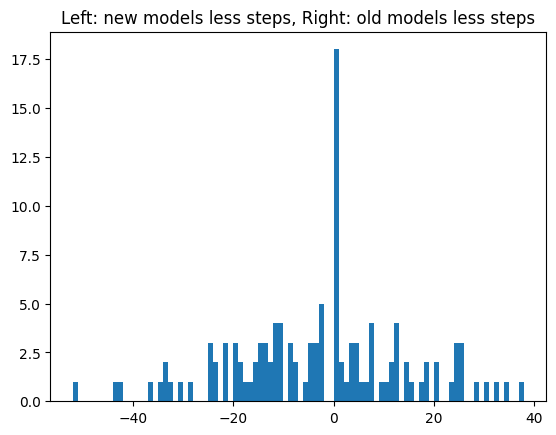

In [19]:
# make a histogram of the step_list

plt.hist(step_list, bins=np.arange(min(step_list), max(step_list)+1, 1))
plt.title("Left: new models less steps, Right: old models less steps")
plt.show()

In [20]:
# print amount of negative and positive values
print(f"new-model less steps: {len([i for i in step_list if i < 0])}")
print(f"old-model less steps: {len([i for i in step_list if i > 0])}")
print(f"Equal steps: {len([i for i in step_list if i == 0])}")


new-model less steps: 60
old-model less steps: 43
Equal steps: 18


In [21]:
# show the most common 3 steps in each model
for i in range(0, len(df_5models['votes'])-2):
    # print the most common 3 models used
    num = 3
    print(f"new models: {sorted(set(df_10models['votes'].iloc[i]), key = df_10models['votes'].iloc[i].count, reverse=True)[:num]}")
    print(f"old models:  {sorted(set(df_5models['votes'].iloc[i]), key = df_5models['votes'].iloc[i].count, reverse=True)[:num]}\n")
    

new models: [7, 1, 8]
old models:  [2, 1, 3]

new models: [0, 9, 3]
old models:  [2, 1, 6]

new models: [3, 7, 1]
old models:  [3, 1, 6]

new models: [7, 9, 4]
old models:  [7, 9, 1]

new models: [9, 1, 0]
old models:  [5, 9, 1]

new models: [4, 6, 5]
old models:  [3, 0, 6]

new models: [7, 5, 4]
old models:  [7, 1, 6]

new models: [9, 0, 1]
old models:  [5, 7, 0]

new models: [9, 1, 4]
old models:  [4, 6, 3]

new models: [4, 1]
old models:  [8, 1, 6]

new models: [9, 1, 4]
old models:  [6, 0, 3]

new models: [5, 1, 9]
old models:  [8, 5, 7]

new models: [0, 1, 7]
old models:  [1, 6, 3]

new models: [7, 5, 6]
old models:  [1, 4, 6]

new models: [7, 0, 9]
old models:  [1, 3, 0]

new models: [0, 6, 2]
old models:  [1, 6, 2]

new models: [8, 6, 7]
old models:  [6]

new models: [0, 8, 1]
old models:  [4, 0, 3]

new models: [0, 9, 6]
old models:  [4, 6, 0]

new models: [0, 8, 2]
old models:  [2, 1, 7]

new models: [7, 1, 4]
old models:  [9, 1, 6]

new models: [4, 9, 2]
old models:  [2, 1, 5

In [22]:
# count the number of times the most common model is used
most_common_10 = [0]*10
most_common_5 = [0]*10

for i in range(0, len(df_5models['votes'])-2):
    # print the most common 3 models used
    most_common_10[sorted(set(df_10models['votes'].iloc[i]), key = df_10models['votes'].iloc[i].count, reverse=True)[0]] += 1
    most_common_5[sorted(set(df_5models['votes'].iloc[i]), key = df_5models['votes'].iloc[i].count, reverse=True)[0]] += 1

print("Number of times the most common model is used:")
print(f"new models: {most_common_10}")
print(f"old models:  {most_common_5}\n")

Number of times the most common model is used:
new models: [21, 2, 12, 9, 16, 6, 9, 22, 4, 20]
old models:  [1, 16, 22, 16, 10, 4, 12, 20, 6, 14]



# The most used 
## Version 5 models
1. Translation
2. Scaling
3. Rotation
4. Shearing
5. Mix 1-4

6. 6-10 Reverse of 1-5

## Version 10 models
1. Translation
2. Scaling
3. Rotation
4. Shearing
5. Mix
6. Translation (no stoppage)
7. Scaling (no stoppage)
8. Rotation (no stoppage)
9. Shearing (no stoppage)
10. Mix 6-9
11. 11-20 Reverse of 1-10

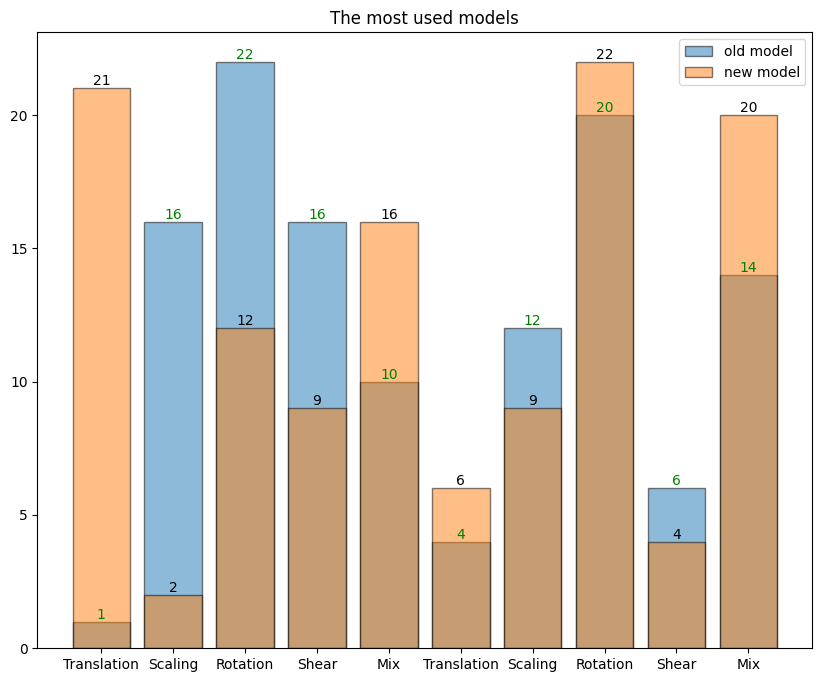

In [23]:
# make histogram of the most common models
plt.figure(figsize=(10, 8))

plt.bar(range(10), most_common_5, alpha=0.5, edgecolor='black')
# show count on top of the bar
for i in range(10):
    plt.text(i, most_common_5[i], most_common_5[i], ha='center', va='bottom', color='green')

# plt.bar(range(5, 10), most_common_5[5:], alpha=0.5, edgecolor='black')
# # show count on top of the bar
# for i in range(5, 10):
#     plt.text(i, most_common_5[i], most_common_5[i], ha='center', va='bottom', color='green')

plt.bar(range(10), most_common_10, alpha=0.5, label='new models', edgecolor='black')
# plt.bar(range(5, 10), most_common_10[5:], alpha=0.5, label='new models', edgecolor='black')
# show count on top of the bar
for i in range(10):
    plt.text(i, most_common_10[i], most_common_10[i], ha='center', va='bottom')

plt.title("The most used models")

# show x label as 1-20
plt.xticks(range(10), ["Translation", "Scaling", "Rotation", "Shear", "Mix", 
           "Translation", "Scaling", "Rotation", "Shear", "Mix"])

# legend 
plt.legend(["old model", "new model"])
plt.show()


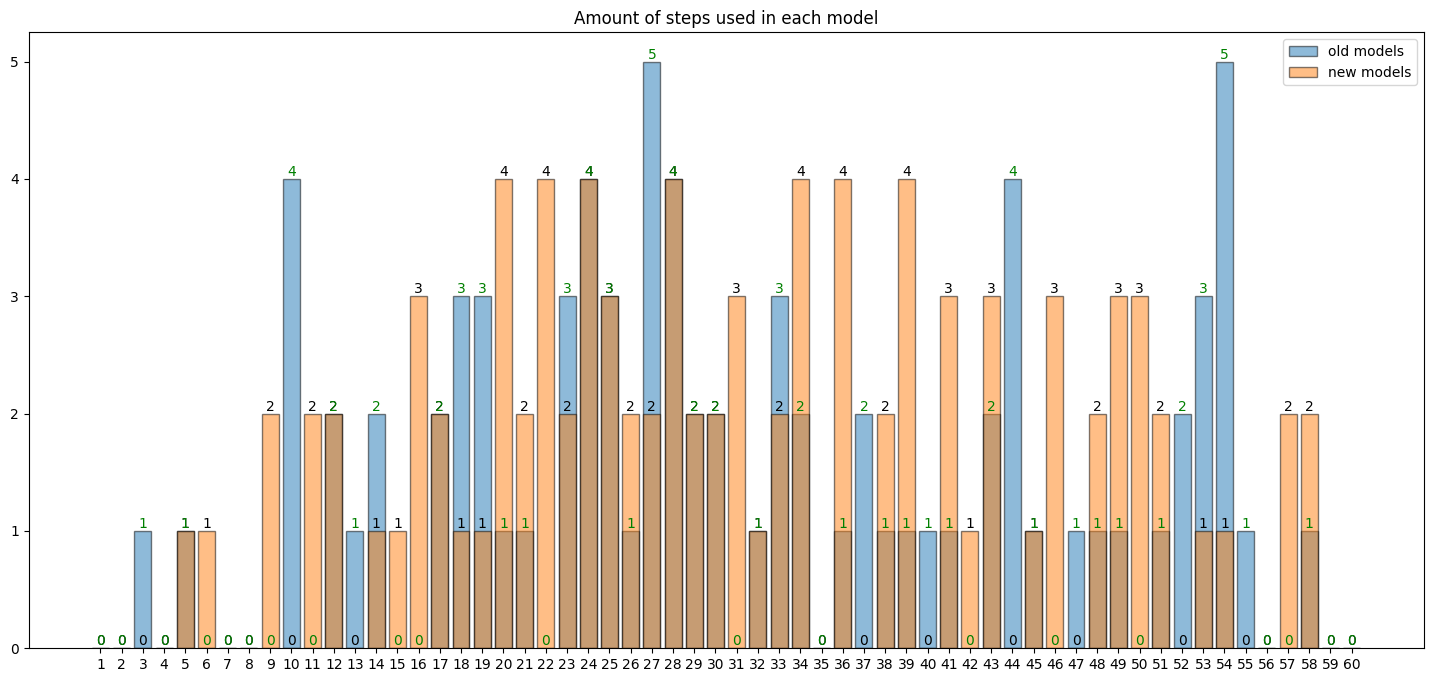

In [24]:
iteration = 60
# amount of steps used in each model
step_list_10 = []
step_list_5 = []

for i in range(0, len(df_5models['votes'])-2):
    step_list_10.append(len(df_10models['votes'].iloc[i]))
    step_list_5.append(len(df_5models['votes'].iloc[i]))

# find frequency of each number in step_list
step_list_10 = [step_list_10.count(i) for i in range(iteration)]
step_list_5 = [step_list_5.count(i) for i in range(iteration)]

# make a histogram of the step_list
plt.figure(figsize=(18, 8))
plt.bar(range(iteration), step_list_5, alpha=0.5, label='old models', edgecolor='black')
plt.bar(range(iteration), step_list_10, alpha=0.5, label='new models', edgecolor='black')

for i in range(iteration):
    # show text above the bar
    plt.text(i, step_list_10[i], step_list_10[i], ha='center', va='bottom')
    plt.text(i, step_list_5[i], step_list_5[i], ha='center', va='bottom', color='green')

plt.xticks(range(iteration), range(1, iteration+1))

plt.title("Amount of steps used in each model")
plt.legend(["old models", "new models"])

# Which model is used the most in each iteration

In [25]:
# count the number of times each model is used at each iteration
model_count_10 = np.zeros((iteration, 10))
model_count_5 = np.zeros((iteration, 10))

for i in range(0, len(df_5models['votes'])-2): # loop along the rows
    for j in range(0, len(df_5models['votes'].iloc[i])): # loop along the columns
        model_count_5[j, df_5models['votes'].iloc[i][j]] += 1

for i in range(0, len(df_10models['votes'])-2): # loop along the rows
    for j in range(0, len(df_10models['votes'].iloc[i])): # loop along the columns
        model_count_10[j, df_10models['votes'].iloc[i][j]] += 1

# create a dataframe from model_count_5
model_count_5_df = pd.DataFrame(model_count_5)

# column head is m1, ..., m10
model_count_5_df.columns = ["Translation", "Scaling", "Rotation", "Shear", "Mix", 
           "Translation rv", "Scaling rv", "Rotation rv", "Shear rv", "Mix rv"]

# convert columns to numeric dtype
# model_count_5_df = model_count_5_df.apply(pd.to_numeric)

# calculate total number in each column
model_count_5_df.loc['total'] = model_count_5_df.sum()

# calculate total number in the row
model_count_5_df['total'] = model_count_5_df.sum(axis=1)

# sort each row and return the column names for the 1st to 3rd highest values, put each of them in separated columns
# model_count_5_df['1st'] = model_count_5_df.apply(lambda x: x.nlargest(1).index[0], axis=1)
# model_count_5_df['2nd'] = model_count_5_df.apply(lambda x: x.nlargest(2).index[1], axis=1)
# model_count_5_df['3rd'] = model_count_5_df.apply(lambda x: x.nlargest(3).index[2], axis=1)

# save file at 'output/model_usage/DHRDiff_18_5models.xlsx'
model_count_5_df.to_excel(f'../output/model_usage (1way pt reverse old-new)/DHRDiff_{dataset}_old_models_count.xlsx')
model_count_5_df.head()


,Translation,Scaling,Rotation,Shear,Mix,Translation rv,Scaling rv,Rotation rv,Shear rv,Mix rv,total
0,18.0,9.0,1.0,8.0,1.0,51.0,18.0,9.0,6.0,0.0,121.0
1,20.0,12.0,2.0,13.0,1.0,30.0,27.0,10.0,6.0,0.0,121.0
2,15.0,15.0,5.0,13.0,3.0,21.0,30.0,10.0,7.0,1.0,120.0
3,11.0,26.0,8.0,12.0,1.0,15.0,23.0,12.0,10.0,2.0,120.0
4,7.0,24.0,5.0,18.0,3.0,13.0,22.0,15.0,11.0,1.0,119.0


In [26]:
# create a dataframe from model_count_10
model_count_10_df = pd.DataFrame(model_count_10)
# column head is m1, ..., m10
model_count_10_df.columns = ["Translation", "Scaling", "Rotation", "Shear", "Mix", 
                             "Translation rv", "Scaling rv", "Rotation rv", "Shear rv", "Mix rv"]
        #    "total", "1st", "2nd", "3rd"]
        #                      "Translation", "Scaling", "Rotation", "Shear", "Mix", 
        #    "Translation rv", "Scaling rv", "Rotation rv", "Shear rv", "Mix rv",
        #    "Translation rv", "Scaling rv", "Rotation rv", "Shear rv", "Mix rv"]

model_count_10_df.loc['total'] = model_count_10_df.sum()
model_count_10_df['total'] = model_count_10_df.sum(axis=1)

# save file at 'output/model_usage/DHRDiff_18_5models.xlsx'
model_count_10_df.to_excel(f'../output/model_usage (1way pt reverse old-new)/DHRDiff_{dataset}_new_models_count.xlsx')
model_count_10_df.head()

,Translation,Scaling,Rotation,Shear,Mix,Translation rv,Scaling rv,Rotation rv,Shear rv,Mix rv,total
0,18.0,19.0,3.0,7.0,3.0,32.0,20.0,2.0,11.0,6.0,121.0
1,18.0,15.0,6.0,12.0,11.0,20.0,17.0,4.0,10.0,8.0,121.0
2,17.0,19.0,8.0,13.0,10.0,10.0,18.0,4.0,15.0,7.0,121.0
3,17.0,17.0,6.0,14.0,21.0,5.0,15.0,5.0,13.0,8.0,121.0
4,17.0,8.0,11.0,13.0,23.0,3.0,17.0,8.0,12.0,8.0,120.0


In [27]:
# # count the number of times each model is used at each iteration
# iteration = 20
# model_count_10 = np.zeros((iteration, 20))
# model_count_5 = np.zeros((iteration, 10))

# for i in range(0, len(df_5models['votes'])-2): # loop along the rows
#     for j in range(0, len(df_5models['votes'].iloc[i])): # loop along the columns
#         model_count_5[j, df_5models['votes'].iloc[i][j]] += 1

# # convert data into percentage by dividing by the sum of each row
# model_count_5 = 100*model_count_5 / model_count_5.sum(axis=1)[:, None]

# for i in range(0, len(df_10models['votes'])-2): # loop along the rows
#     for j in range(0, len(df_10models['votes'].iloc[i])): # loop along the columns
#         model_count_10[j, df_10models['votes'].iloc[i][j]] += 1

# # convert data into percentage by dividing by the sum of each row
# model_count_10 = 100*model_count_10 / model_count_10.sum(axis=1)[:, None]

# # create a dataframe from model_count_5
# model_count_5_df = pd.DataFrame(model_count_5)
# # column head is m1, ..., m10
# model_count_5_df.columns = ["Translation", "Scaling", "Rotation", "Shear", "Mix", 
#            "Translation rv", "Scaling rv", "Rotation rv", "Shear rv", "Mix rv"] 

# # save file at 'output/model_usage/DHRDiff_1_5models.xlsx'
# model_count_5_df.to_excel(f'output/model_usage/DHRDiff_{dataset}_5models_percent.xlsx')
# model_count_5_df.head()

In [28]:
# # create a dataframe from model_count_10
# model_count_10_df = pd.DataFrame(model_count_10)
# # column head is m1, ..., m10
# model_count_10_df.columns = ["Translation", "Scaling", "Rotation", "Shear", "Mix", 
#                              "Translation", "Scaling", "Rotation", "Shear", "Mix", 
#            "Translation rv", "Scaling rv", "Rotation rv", "Shear rv", "Mix rv",
#            "Translation rv", "Scaling rv", "Rotation rv", "Shear rv", "Mix rv"]

# # save file at 'output/model_usage/DHRDiff_1_10models.xlsx'
# model_count_10_df.to_excel(f'output/model_usage/DHRDiff_{dataset}_10models_percent.xlsx')
# model_count_10_df.head()
